In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

In [2]:
"https://brasil.io/home/"

'https://brasil.io/home/'

In [3]:
df = pd.read_csv('caso2023.csv')
df.head()


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132
1,2022-03-26,AP,NaN,state,160321,2122,733,False,845731.0,861773.0,16.0,18603.62300,0.0132
2,2022-03-25,AP,NaN,state,160314,2122,732,False,845731.0,861773.0,16.0,18602.81072,0.0132
3,2022-03-24,AP,NaN,state,160301,2122,731,False,845731.0,861773.0,16.0,18601.30220,0.0132
4,2022-03-23,AP,NaN,state,160288,2122,730,False,845731.0,861773.0,16.0,18599.79368,0.0132


# Nova seção

In [4]:
# Usando a função (LOC) de localização podemos acessar qualquer dado dentro do df passando aparametros
# Criamos outro df com nome ESTADOS para armezenar os dados
estados = df.loc[df.place_type=='state', :]
estados.head(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132
1,2022-03-26,AP,NaN,state,160321,2122,733,False,845731.0,861773.0,16.0,18603.62300,0.0132
2,2022-03-25,AP,NaN,state,160314,2122,732,False,845731.0,861773.0,16.0,18602.81072,0.0132
3,2022-03-24,AP,NaN,state,160301,2122,731,False,845731.0,861773.0,16.0,18601.30220,0.0132
4,2022-03-23,AP,NaN,state,160288,2122,730,False,845731.0,861773.0,16.0,18599.79368,0.0132
5,2022-03-22,AP,NaN,state,160275,2122,729,False,845731.0,861773.0,16.0,18598.28516,0.0132
6,2022-03-21,AP,NaN,state,160265,2120,728,False,845731.0,861773.0,16.0,18597.12476,0.0132
7,2022-03-20,AP,NaN,state,160260,2120,727,False,845731.0,861773.0,16.0,18596.54457,0.0132
8,2022-03-19,AP,NaN,state,160258,2120,726,False,845731.0,861773.0,16.0,18596.31249,0.0132
9,2022-03-18,AP,NaN,state,160255,2120,725,False,845731.0,861773.0,16.0,18595.96437,0.0132


In [5]:
# Buscando os valores unicos do df estados
len(estados.state.unique())

27

In [6]:
# Vamos comparar por estados 
data = estados[['date', 'state', 'confirmed', 'deaths', 'is_last']]
data.head()

,date,state,confirmed,deaths,is_last
0,2022-03-27,AP,160328,2122,True
1,2022-03-26,AP,160321,2122,False
2,2022-03-25,AP,160314,2122,False
3,2022-03-24,AP,160301,2122,False
4,2022-03-23,AP,160288,2122,False


In [7]:
#Criando um dataframe
covid = pd.DataFrame()

In [8]:
#Vamos montar uma função para verificar os estados

estado = "SP"
situacao = "confirmed"
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

# Vamos excluir a coluna data mantendo os valores anexados
df_estado = df_estado.drop('date', axis=1)

# Alterando o nome da coluna pelo nome ESTADOS
df_estado.columns = [estado]

#Vamos juntas as informações dentro de um dataset(covid) utilizando a função
covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)

covid

C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2164684713.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


,SP
0,1
1,1
2,1
3,2
4,2
...,...
738,5202983
739,5211936
740,5221236
741,5228413


In [9]:
#Media mortes por estado
covid.mean()

SP    2.391454e+06
dtype: float64

In [10]:
#Numero Maximo de mortes
covid.max()

SP    5232374
dtype: int64

In [11]:
#Numero minimo de mortes por estados
covid.min()

SP    1
dtype: int64

In [12]:
#REUTILIZANDO A FUNÇÃO 
estado = "RJ"
situacao = "confirmed"
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

# Vamos excluir a coluna data mantendo os valores anexados
df_estado = df_estado.drop('date', axis=1)

# Alterando o nome da coluna pelo nome ESTADOS
df_estado.columns = [estado]

#Vamos juntas as informações dentro de um dataset(covid) utilizando a função
covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)

covid


C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\230219341.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


,SP,RJ
0,1,1.0
1,1,2.0
2,1,3.0
3,2,15.0
4,2,24.0
...,...,...
738,5202983,NaN
739,5211936,NaN
740,5221236,NaN
741,5228413,NaN


In [13]:
# Drop para corrigir erro apagando as multiplas colunas
covid.drop(2)

,SP,RJ
0,1,1.0
1,1,2.0
3,2,15.0
4,2,24.0
5,2,25.0
...,...,...
738,5202983,NaN
739,5211936,NaN
740,5221236,NaN
741,5228413,NaN


In [14]:
estado = "MG"
situacao = "confirmed"
df_estado = data.loc[data.state==estado, :]
df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

# Vamos excluir a coluna data mantendo os valores anexados
df_estado = df_estado.drop('date', axis=1)

# Alterando o nome da coluna pelo nome ESTADOS
df_estado.columns = [estado]

#Vamos juntas as informações dentro de um dataset(covid) utilizando a função
covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)

covid


C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2769223037.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


,SP,RJ,MG
0,1.0,1.0,1
1,1.0,2.0,1
2,1.0,3.0,1
3,2.0,15.0,1
4,2.0,24.0,2
...,...,...,...
740,5221236.0,NaN,3306753
741,5228413.0,NaN,3310675
742,5232374.0,NaN,3313844
743,NaN,NaN,3317059


In [15]:
# Vamos montar uma função para trazer todos so dados de ESTADOS
def desde1caso(data, estados, dias, situacao):
    
    covid = pd.DataFrame()
    
    for estado in estados:
        try:
            df_estado = data.loc[data.state==estado, :]
            df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
    
            df_estado = df_estado.drop('date', axis=1)
            df_estado.columns = [estado]
            covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)
        except:
            print("is not " + situacao + "in " + estado)
    

    covid.columns = estados
    
    return covid.head(dias)

In [16]:
df_estados = desde1caso(data, ['SP', 'RJ', 'AM', 'MG', 'BH'], 345, 'confirmed')

C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only

<Axes: >

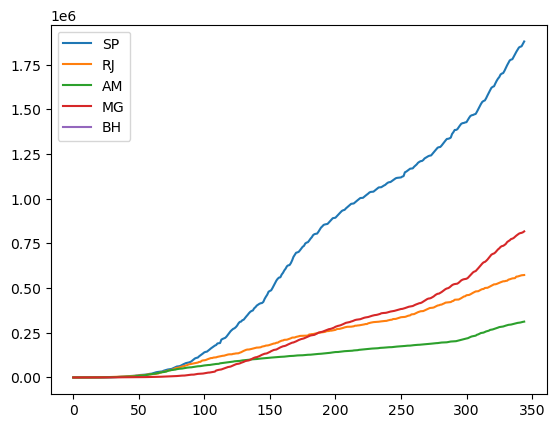

In [17]:
df_estados.plot()

# VERIFICANDO A CORRELAÇÃO ENTRE CASOS E MORTES UNSAM COEFICIENTE DE PEAESON

In [18]:
df_corr = pd.DataFrame()

In [19]:
sp_confirmed = desde1caso(data, ['SP'], 345, 'confirmed')
sp_deaths = desde1caso(data, ['SP'], 345, 'deaths')

C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


In [20]:
df_corr = pd.concat([df_corr, sp_confirmed, sp_deaths], ignore_index=True, axis=1)
df_corr.columns = ['confirmed', 'deaths']

In [21]:
df_corr

,confirmed,deaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
340,1845086,54545
341,1849334,54614
342,1851776,54663
343,1864977,55087


<Axes: >

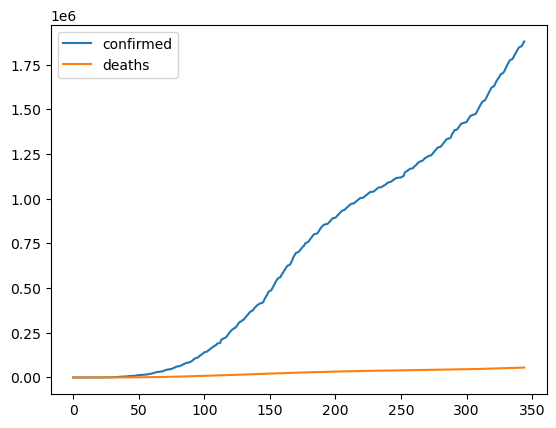

In [22]:
df_corr.plot()

In [23]:
df_corr.corr(method="spearman")

,confirmed,deaths
confirmed,1.000000,0.999918
deaths,0.999918,1.000000


In [24]:
df_corr = pd.DataFrame()

In [25]:
rj_confirmed = desde1caso(data, ['RJ'], 345, 'confirmed')
rj_deaths = desde1caso(data, ['RJ'], 345, 'deaths')

C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()
C:\Users\Samir\AppData\Local\Temp\ipykernel_10048\2057455989.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df_estado.groupby('date').sum()[situacao].reset_index()


In [26]:
df_corr = pd.concat([df_corr, sp_confirmed, sp_deaths], ignore_index=True, axis=1)
df_corr.columns = ['confirmed', 'deaths']
df_corr

,confirmed,deaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
340,1845086,54545
341,1849334,54614
342,1851776,54663
343,1864977,55087


<Axes: >

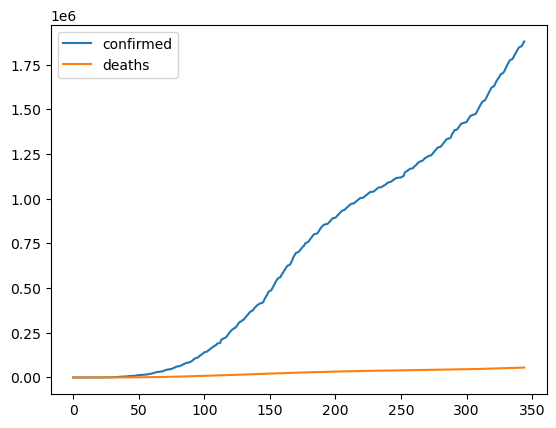

In [27]:
df_corr.plot()

In [28]:
df_corr.corr(method="spearman")

,confirmed,deaths
confirmed,1.000000,0.999918
deaths,0.999918,1.000000
